In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import requests

In [4]:
## takes forever to run
# Set the base URL for the API
BASE_URL = "https://rest.genenames.org"

# Define a function to get the protein for a gene
def get_protein(gene_symbol):
    url = f"{BASE_URL}/fetch/symbol/{gene_symbol}"
    headers = {
        "Accept": "application/json"
    }
    response = requests.get(url, headers=headers)
    data = response.json()
    protein = data.get("response", {}).get("docs", [])[0].get("uniprot_ids", [])
    return protein

# Define a function to create the knowledge graph for all human genes
# def create_knowledge_graph():
#     # Create an empty graph
#     G = nx.Graph()

#     # Retrieve all human gene symbols
#     url = f"{BASE_URL}/fetch/status/Approved"
#     headers = {
#         "Accept": "application/json"
#     }
#     response = requests.get(url, headers=headers)
#     data = response.json()
#     gene_symbols = [doc.get("symbol") for doc in data.get("response", {}).get("docs", [])]

#     # Add each gene and its protein to the graph
#     for gene_symbol in gene_symbols:
#         G.add_node(gene_symbol, type="gene")
#         proteins = get_protein(gene_symbol)
#         for p in proteins:
#             G.add_node(p, type="protein")
#             G.add_edge(gene_symbol, p, type="expression")

#     return G

# # Example usage
# G = create_knowledge_graph()

# # Print the nodes and edges of the graph
# print("Nodes:", G.nodes)
# print("Edges:", G.edges)

In [5]:
# Create an empty graph
G = nx.Graph()

# Retrieve all human gene symbols
url = f"{BASE_URL}/fetch/status/Approved"
headers = {
    "Accept": "application/json"
}
response = requests.get(url, headers=headers)
data = response.json()
gene_symbols = [doc.get("symbol") for doc in data.get("response", {}).get("docs", [])]

 

In [6]:
# Add each gene and its protein to the graph
for gene_symbol in gene_symbols[0:100]:
    # I just take the first 10 genes to make it faster
    G.add_node(gene_symbol, type="gene")
    proteins = get_protein(gene_symbol)
    for p in proteins:
        G.add_node(p, type="protein")
        G.add_edge(gene_symbol, p, type="expression")
#2m 23.8s for 99 genes
#2m 26.8s for 100 genes

In [8]:
print("Nodes:", len(G.nodes))
print("Edges:", len(G.edges))

Nodes: 169
Edges: 69


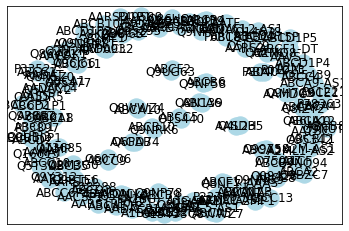

In [9]:
# Set up the layout for the graph
pos = nx.spring_layout(G)

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_color="lightblue")
nx.draw_networkx_edges(G, pos, edge_color="grey")
nx.draw_networkx_labels(G, pos)

# Show the plot
plt.show()